<a href="https://colab.research.google.com/github/sebasramirez99/Parcial3-HPC-/blob/main/ModeloPythonSklearn/Parcial3(HPC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align=""><br><br><FONT FACE="times new roman" SIZE=5>
</div>


> *Nombre completo:*
  * Juan Sebastián Bueno (juan.bueno01@correo.usa.edu.co) 

> *Escuela de Ciencias Exactas e Ingeniería*

> *Fecha*: 11/05/2022

> ***Parcial 3***

In [ ]:
# Se importan las bibliotecas necesarias (libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from IPython.core.pylabtools import figsize
from sklearn.metrics import r2_score

In [ ]:
# Se importan los resultados obtenidos en el modelo implementado
# en C++ (modelo de regresión lineal) Entrenamiento 
costoCpp = pd.read_csv("/content/vectorCosto.txt", header=None)
thetaCpp = pd.read_csv("/content/vectorTheta.txt", header=None)
y_hatCpp = pd.read_csv("/content/Prediccion.txt", header=None)

# en C++ (modelo de regresión lineal) prueba
costoCpptest = pd.read_csv("/content/vectorCostoTest.txt", header=None)
thetaCpptest = pd.read_csv("/content/vectorThetaTest.txt", header=None)
y_hatCpptest = pd.read_csv("/content/PrediccionTest.txt", header=None)



In [ ]:
# Se importa a un DataFrame el dataset insuranceHPC
df = pd.read_csv("/content/insuranceHPC.csv")
df.head()

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,19,0,27.900,0,0,0
1,1725.55230,18,1,33.770,1,1,1
2,4449.46200,28,1,33.000,3,1,1
3,21984.47061,33,1,22.705,0,1,2
4,3866.85520,32,1,28.880,0,1,2


##Análisis Exploratorio de los Datos del Dataset entregado (Información, Resumen Estadístico, Correlación, Distribución, etc.)

In [ ]:
# A continuación, se realiza el EDA (Análisis exploratorio de los datos)
# 1.- Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   charges   1338 non-null   float64
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
# 2.- Se observa un resumen estadístico de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000


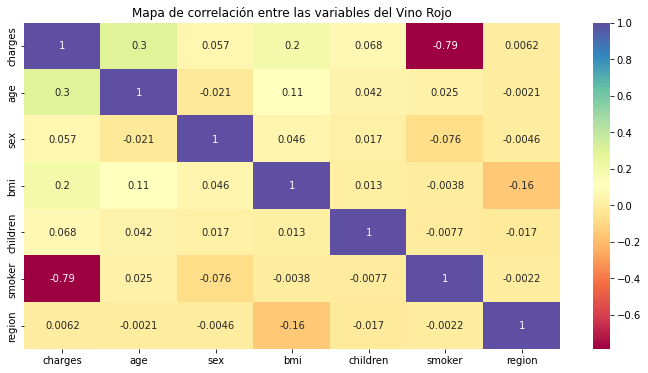

In [ ]:
# 3.- A continuación, se presenta la matriz de correlación: Representa
# el grado de afinidad entre las variables. Si el Factor es cercano a
# 1 o -1, representa una alta afinidad o relación (directa o indirectamente
# proporcional)
mathCorr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(mathCorr, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre las variables del Vino Rojo')
plt.show()

In [ ]:
# Dada esa matriz de correlación, se presume que no hay una relación inversamente
# proporcional entre la variable dependiente e independientes, por lo tanto,
# se evidencia que presenta una relación significativamente baja.

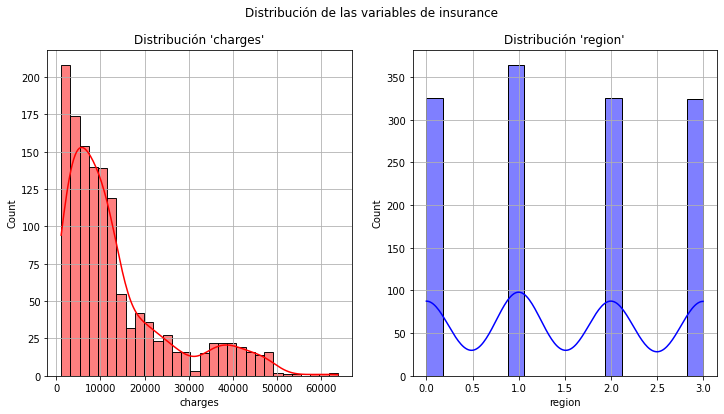

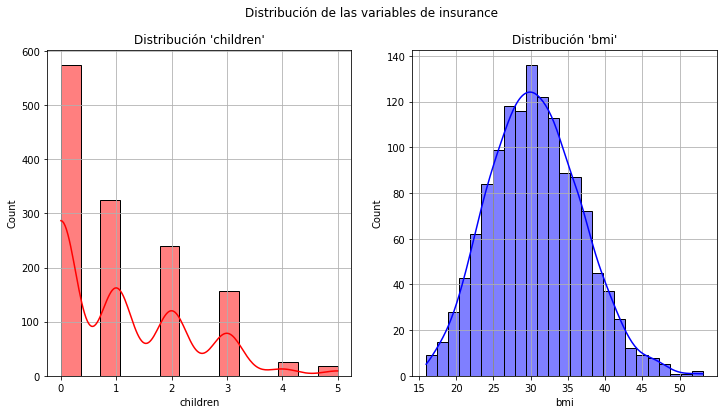

In [ ]:
# 4.- A continuación, se presenta la distribución de las variables que tienen mas relación significativa
# (se espera que la distribución de todas las varibales sea Normal-Gaussiana)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de las variables de insurance')
sns.histplot(df['charges'], kde=True, color='r', ax=axes[0])
sns.histplot(df['region'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'charges'")
axes[1].grid()
axes[1].set_title("Distribución 'region'")
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de las variables de insurance')
sns.histplot(df['children'], kde=True, color='r', ax=axes[0])
sns.histplot(df['bmi'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'children'")
axes[1].grid()
axes[1].set_title("Distribución 'bmi'")
plt.show()

In [ ]:
# Se puede apreciar que las variables presentan una distribución Normal

##Vectores de predicciones del modelo LR Sklearn (y_train_hat_sk, y_test_hat_sk)

In [ ]:
# Se separa en 2 grupos: variables dependientes e independientes

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']



---
A continuación, se dividen los datos en 2 grupos: prueba y entrenamiento (test, train)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Se selecciona el modelo de Machine Learning: En un Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [ ]:
# Se entrenan los datos
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [ ]:
# Se toman los valores de predicción de entrenamiento
y_train_hatSk = pipe.predict(X_train)
# Se toman los valores de predicción de test
y_test_hatSk = pipe.predict(X_test)

##Vector de coeficientes y punto de corte del Modelo RL en Sklearn

In [ ]:
reg = LinearRegression().fit(X_train, y_train)


In [ ]:
reg.coef_

array([   259.91583957,   -246.70965668,    334.50820583,    441.81651302,
       -23631.78924739,    437.18170076])

In [ ]:
reg.intercept_

10522.093373556294

##Comparación del promedio de los datos y la normalización entre Sklearn y C++

###Promedio

In [ ]:
df.mean()

charges     13270.422265
age            39.207025
sex             0.505232
bmi            30.663397
children        1.094918
smoker          0.795217
region          1.484305
dtype: float64

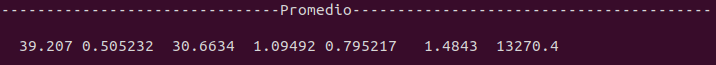

###Desviación Standart

In [ ]:
df.describe()

,charges,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422265,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305
std,12110.011237,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,1121.873900,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,4740.287150,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000
50%,9382.033000,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000
75%,16639.912515,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000
max,63770.428010,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


###Normalización (Z-Score)

La fórmula es: (X-mean) / std se calcula para cada atributo / columna por separado.

Los datos se restan de su atributo medio por período (por columna) y se aplica su varianza. El resultado es que para cada atributo / columna todos los datos se agrupan alrededor de 0 con una varianza de 1.

Usando la función sklearn.preprocessing.scale (), puede normalizar directamente los datos dados.

In [ ]:
from sklearn import preprocessing

In [ ]:
X_scaled = preprocessing.scale(df)

In [ ]:
print(X_scaled[1334])
print(X_scaled[1335])
print(X_scaled[1336])
print(X_scaled[1337])

[-0.91400233 -1.50996545 -1.0105187   0.20613881 -0.90861367  0.5074631
  1.37232554]
[-0.96159623 -1.50996545 -1.0105187   1.0148781  -0.90861367  0.5074631
 -0.43849455]
[-0.93036151 -1.29636188 -1.0105187  -0.79781341 -0.90861367  0.5074631
 -1.34390459]
[ 1.31105347  1.55168573 -1.0105187  -0.26138796 -0.90861367 -1.97058663
  0.46691549]


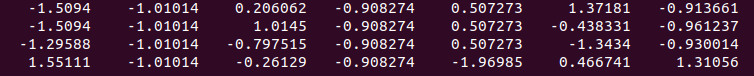

##Entrenamiento

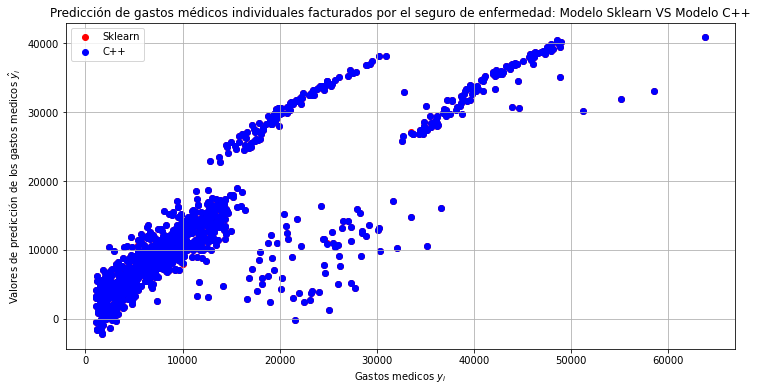

In [ ]:
# Se presentan las gráficas de predicciones entre el modelo C++ y
# el modelo Sklearn
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_train, y_train_hatSk, c='r', label='Sklearn')
plt.scatter(y_train, y_hatCpp, c='b', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Predicción de gastos médicos individuales facturados por el seguro de enfermedad: Modelo Sklearn VS Modelo C++')
plt.xlabel('Gastos medicos $y_i$')
plt.ylabel('Valores de predicción de los gastos medicos $\hat{y_i}$')
plt.show()

In [ ]:
# Se extrae las métricas de rendimiento
r2Sk = r2_score(y_train, y_train_hatSk)
r2Cpp = r2_score(y_train, y_hatCpp)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk}")
print(f"Métrica de rendimiento CPP (r2_score) {r2Cpp}")

Métrica de rendimiento SK (r2_score) 0.7485033969376796
Métrica de rendimiento CPP (r2_score) 0.7485033869434954


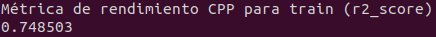

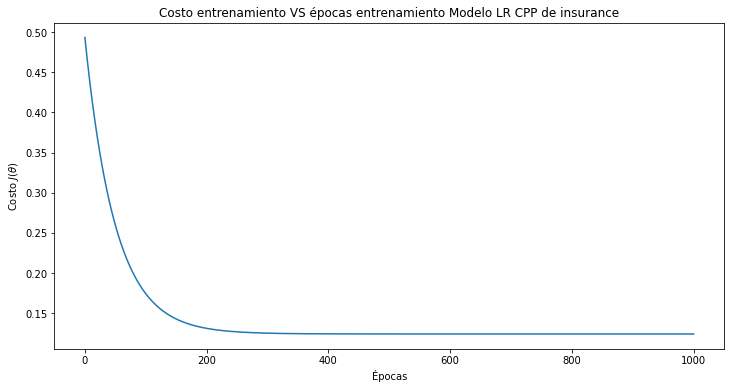

In [ ]:
# Se presenta la función de costo
plt.figure(figsize=(12, 6))
plt.plot(costoCpp)
plt.title('Costo entrenamiento VS épocas entrenamiento Modelo LR CPP de insurance')
plt.ylabel(r'Costo $J(\theta)$')
plt.xlabel('Épocas')
plt.show()

In [ ]:
# El gradiente descendiente representa las derivadas parciales
# m y b representa los coeficientes
# en la función de costo 

# Se observa que a medida que se itera, se va encontrando el mínimo valor para
# que la función de costo sea mínima.

##Test

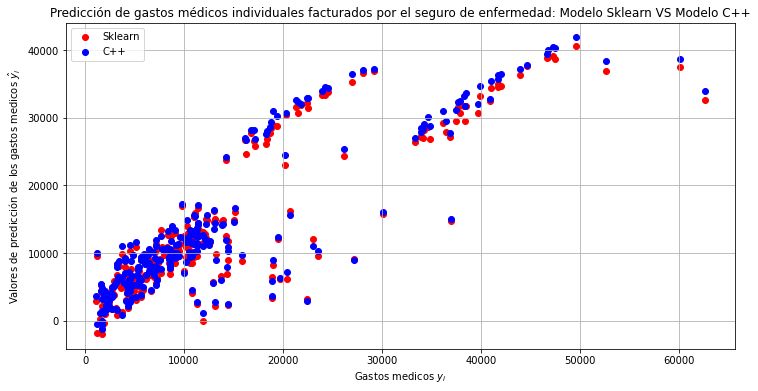

In [ ]:
# Se presenty_trainan las gráficas de predicciones entre el modelo C++ y
# el modelo Sklearn
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_test, y_test_hatSk, c='r', label='Sklearn')
plt.scatter(y_test, y_hatCpptest, c='b', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Predicción de gastos médicos individuales facturados por el seguro de enfermedad: Modelo Sklearn VS Modelo C++')
plt.xlabel('Gastos medicos $y_i$')
plt.ylabel('Valores de predicción de los gastos medicos $\hat{y_i}$')
plt.show()

In [ ]:
# Se extrae las métricas de rendimiento
r2Sk = r2_score(y_test, y_test_hatSk)
r2Cpp = r2_score(y_test, y_hatCpptest)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk}")
print(f"Métrica de rendimiento CPP (r2_score) {r2Cpp}")

Métrica de rendimiento SK (r2_score) 0.7580723949522936
Métrica de rendimiento CPP (r2_score) 0.76238595535912


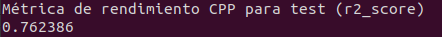

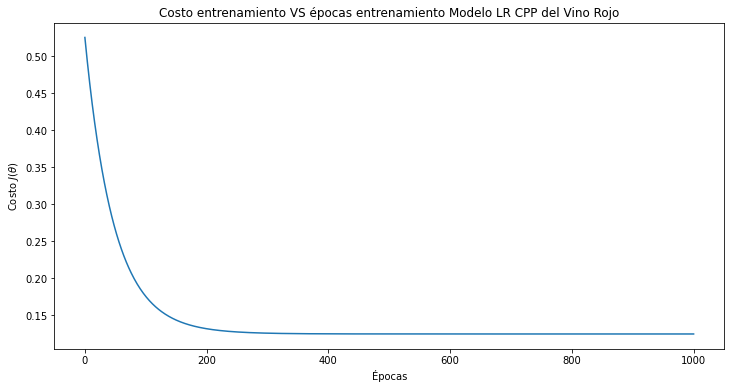

In [ ]:
# Se presenta la función de costo
plt.figure(figsize=(12, 6))
plt.plot(costoCpptest)
plt.title('Costo entrenamiento VS épocas entrenamiento Modelo LR CPP del Vino Rojo')
plt.ylabel(r'Costo $J(\theta)$')
plt.xlabel('Épocas')
plt.show()

In [ ]:
# El gradiente descendiente representa las derivadas parciales
# m y b representa los coeficientes
# en la función de costo 

# Se observa que a medida que se itera, se va encontrando el mínimo valor para
# que la función de costo sea mínima.

##Cambio del dataframe

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [ ]:
new_df=X.assign(charges=y)

In [ ]:
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [ ]:
new_df.to_csv(r'insuranceHPCCPP.csv',header=False, index=False)